In [2]:
"""
Description: This code uses an Artificial RNN (LSTM: Long Short Term Memory Architecture) to predict the 
closing stock price of an organisation using the past 90 days stock price.
We use RNN as we are processing a sequence of data, and not standalone data points.
"""

# Importing the required libraries.
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

plt.style.use("fivethirtyeight")

In [44]:
# Get the stock details, in a dataframe using Pandas, for stock: AAPL
df = yf.download("AMZN", start="2010-01-01", end="2023-12-07")
# Display the data.
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.812500,6.830500,6.657000,6.695000,6.695000,151998000
2010-01-05,6.671500,6.774000,6.590500,6.734500,6.734500,177038000
2010-01-06,6.730000,6.736500,6.582500,6.612500,6.612500,143576000
2010-01-07,6.600500,6.616000,6.440000,6.500000,6.500000,220604000
2010-01-08,6.528000,6.684000,6.451500,6.676000,6.676000,196610000
...,...,...,...,...,...,...
2023-11-30,144.759995,146.929993,144.330002,146.089996,146.089996,65814000
2023-12-01,146.000000,147.250000,145.550003,147.029999,147.029999,39924600
2023-12-04,145.250000,145.350006,142.809998,144.839996,144.839996,48294200


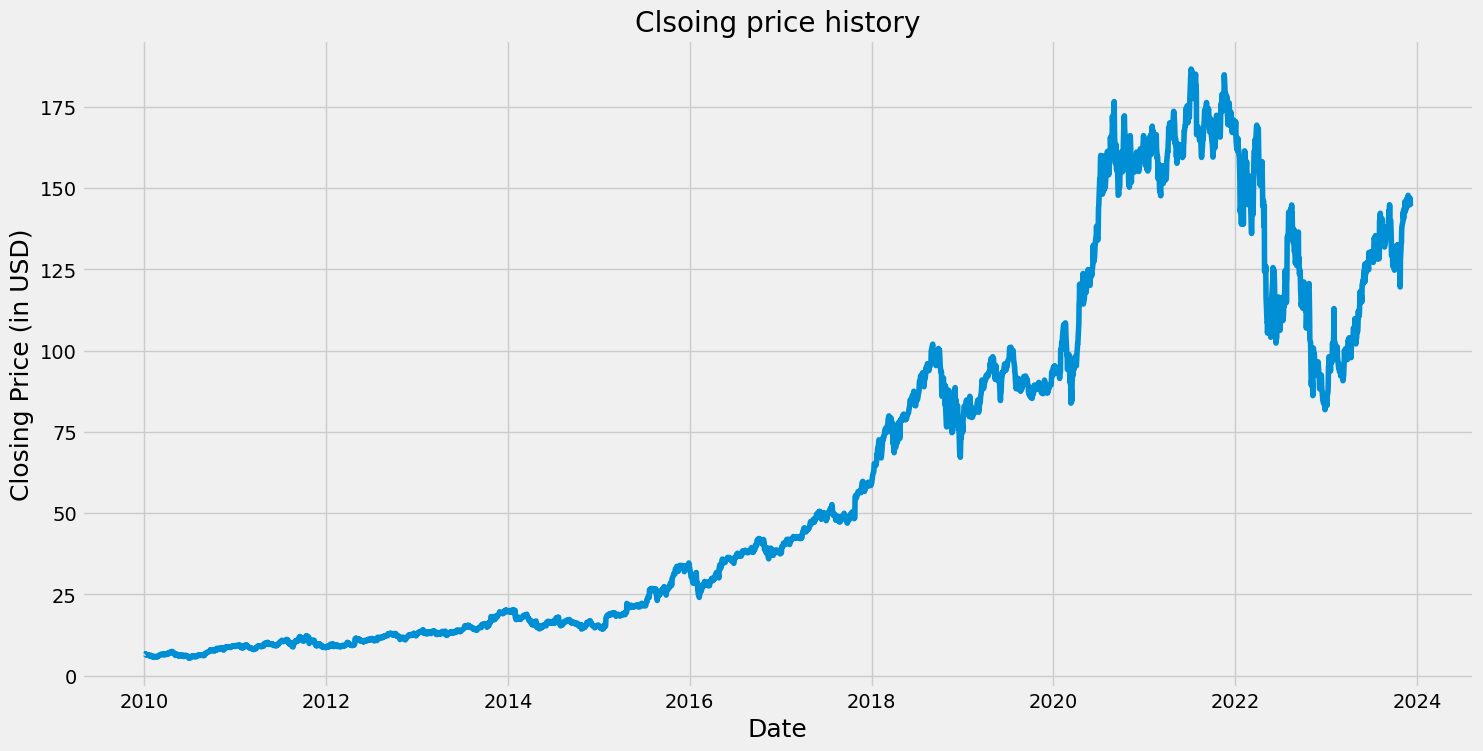

In [45]:
# Visualising the closing price history.
plt.figure(figsize=(16, 8))
plt.title("Clsoing price history")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price (in USD)", fontsize=18)
plt.show()

In [46]:
# Create a new dataframe with only the "Close" column.
data = df.filter(["Close"])
# Converting the dataframe into a NumPy array.
dataset = data.values

# Get the number of training examples.
training_data_len = int(math.ceil(0.75 * len(dataset)))

# Data preprocessing: Scale the data.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00698079],
       [0.00719885],
       [0.00652534],
       ...,
       [0.76962294],
       [0.780885  ],
       [0.7678564 ]])

In [30]:
"""
Training the model.
"""
# Create the scaled training dataset.
train_data = scaled_data[:training_data_len, :]
# Split the data into x_train and y_train dataset.
x_train, y_train = [], []

# Append the past 120 day values.
for i in range(120, len(train_data)):
    x_train.append(train_data[i - 120:i, 0])
    y_train.append(train_data[i, 0])
"""
x_train array contains the past 90 days value of the closing price of the stock.
y_train contains the 91st value that we want our model to be able to predict based on those
past 90 day closing prices.
"""
print(x_train[0])
print(y_train[0])

[4.13671951e-03 4.20641999e-03 3.56406040e-03 3.49058981e-03
 3.75431632e-03 3.40205891e-03 2.95183652e-03 3.50377638e-03
 3.27396073e-03 2.61464697e-03 4.33074554e-03 3.70722643e-03
 3.01776689e-03 1.07373646e-03 2.07589368e-03 2.61653077e-03
 2.98197978e-03 1.36383361e-03 1.88128164e-06 5.04842430e-04
 7.17706429e-04 1.35253083e-03 0.00000000e+00 6.42354561e-04
 3.89933345e-04 7.79871721e-04 5.78307987e-04 1.24704073e-03
 1.56916494e-03 2.13805897e-03 1.97794128e-03 2.04952053e-03
 1.81216717e-03 1.57669761e-03 9.43757005e-04 1.62191125e-03
 1.87433246e-03 2.36787463e-03 3.19107870e-03 3.16470555e-03
 3.25512025e-03 3.51507917e-03 5.06729497e-03 5.09178432e-03
 5.83398262e-03 6.17682357e-03 6.30114912e-03 6.50836676e-03
 5.98845144e-03 6.10335801e-03 6.04119523e-03 6.14103394e-03
 5.68893279e-03 6.15987191e-03 6.83990492e-03 7.03016588e-03
 6.51778323e-03 7.31838426e-03 7.59905739e-03 8.25083597e-03
 8.09071576e-03 8.27344153e-03 8.74814824e-03 8.94594438e-03
 9.14562180e-03 9.023177

In [47]:
# Convert the x_train and y_train dataset to NumPy arrays.
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the x_train dataset.
"""
LSTM Network expects the data to be 3-D: Number of samples, timestamps, features.
"""
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [48]:
# Build the LSTM Model Architecture.
model = Sequential()

# Add the first LSTM layer with 50 neurons.
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# Adding the second and last LSTM layer also with 50 neurons. It won't return any sequence.
model.add(LSTM(50, return_sequences=False))

# Adding further layers: A densely connected NN with 25 neurons and 1 neuron.
model.add(Dense(25))
model.add(Dense(1))

In [49]:
# Compile the model.
model.compile(optimizer="adam", loss="mean_squared_error")
# Train the model.
"""
No. of forward and backward passes for backpropagation algorithm = 1.
Batch size = 1.
"""
model.fit(x_train, y_train, batch_size=1, epochs=1)

2510/2510 [==============================] - 35s 14ms/step - loss: 2.5853e-04


In [50]:
# Create the testing dataset.
test_data = scaled_data[training_data_len - 120:, :]
# Create the datasets x_test and y_test.
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(120, len(test_data)):
    x_test.append(test_data[i - 120:i, 0])

In [51]:
# Convert the data to a NumPy array.
x_test = np.array(x_test)
# Reshape the data.
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(876, 120, 1)

In [52]:
# Get the model's predicted price values.
predictions = model.predict(x_test)
# Unscale the values to compare the predictions.
predictions = scaler.inverse_transform(predictions)

28/28 [==============================] - 0s 9ms/step


In [53]:
# Evaluation of the model using RMSE Error.
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

7.287978329722835

/var/folders/0h/y4fy_xz518s_vknnw20cl2d40000gn/T/ipykernel_1160/1365956894.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


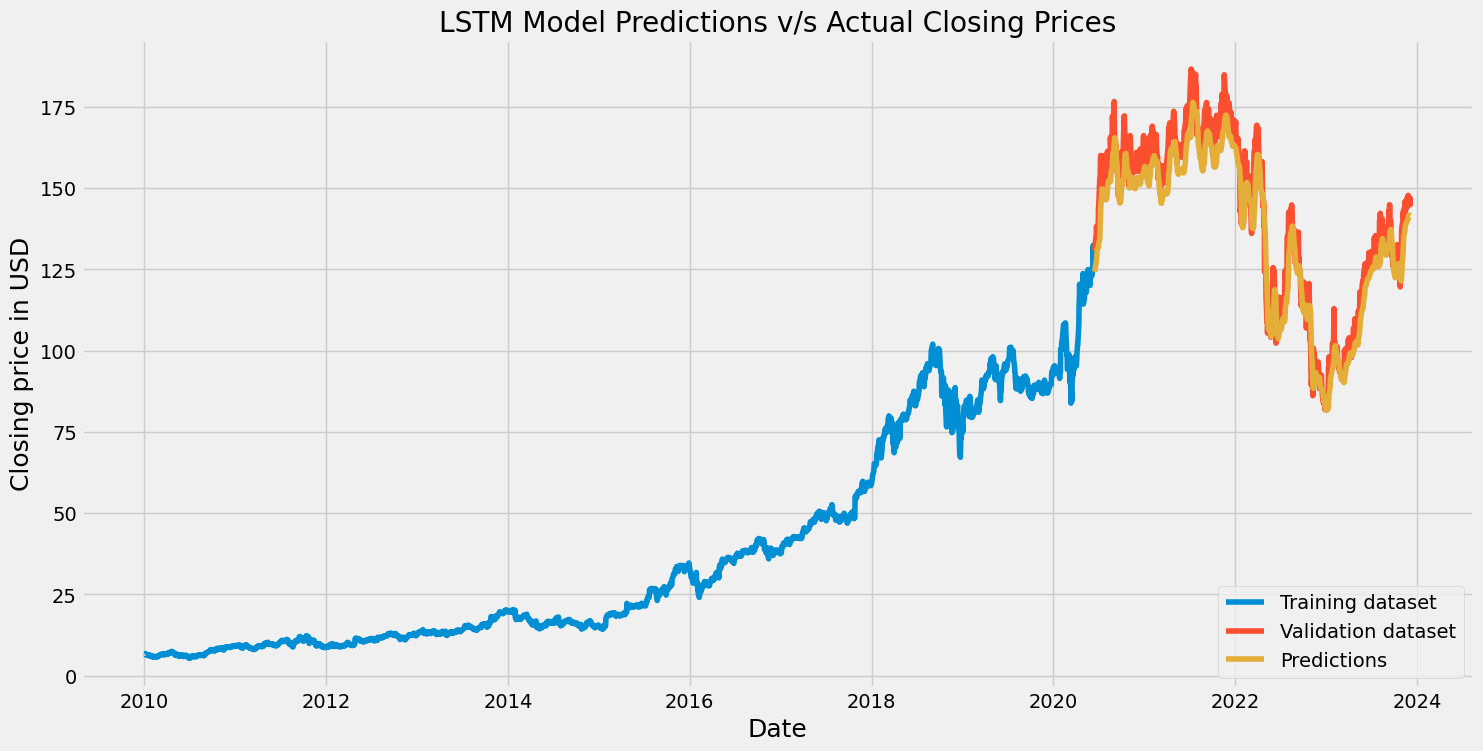

In [54]:
# Plot the data.
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

# Visualise the model.
plt.figure(figsize=(16, 8))
plt.title("LSTM Model Predictions v/s Actual Closing Prices")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing price in USD", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Training dataset", "Validation dataset", "Predictions"], loc="lower right")
plt.show()

In [55]:
# Dealing in numbers!
valid

,Close,Predictions
Date,,
2020-06-16,130.763504,124.261009
2020-06-17,132.048996,124.797157
2020-06-18,132.699005,125.475044
2020-06-19,133.750504,126.216110
2020-06-22,135.690994,127.026154
...,...,...
2023-11-30,146.089996,141.513123
2023-12-01,147.029999,141.565491
2023-12-04,144.839996,141.652466


In [57]:
# Predicting the price for the upcoming day.

amazon_quote = yf.download("AMZN", start="2010-01-01", end="2023-12-07")
# Create a new dataframe.
new_df = amazon_quote.filter(["Close"])
# Get the last 120 day record.
last_days = new_df[-120:].values

# Scaling the data.
last_days = scaler.transform(last_days)
# Create the testing dataset.
X_test = []
X_test.append(last_days)
X_test = np.array(X_test)

# Reshape the data.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)

# Inverse the scaling.
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed
1/1 [==============================] - 0s 14ms/step
[[141.16023]]
